<a href="https://colab.research.google.com/github/Edugera/DSNP_Projetos_Data_Science/blob/master/Analisando_Dados_do_Airbnb_em_Dublin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DSNP - DATA SCIENCE NA PRÁTICA com Carlos Melo**
by Eduardo Ferreira

#*PROJETO 1 - Análise dos dados do Airbnb - Dublin - Irlanda*

Este é o primeiro projeto das atividades propostas no Curso Data Science na Prática com Carlos Melo e a escolha da cidade de Dublin deve-se ao interesse em ir conhecê-la porque aparece em vários filmes, abaixo fica uma lista de 17 deles como exemplo e os mais românticos inspiraram minha esposa e eu a querer conhecer a região assim que a situação permitir, seguem os  filmes:


In The Name of The Father (1993)

The Guard – O Guarda (2011)

Once (2007)

Intermission (2004)

The Magdalene Sisters (2002)

Agnes Browne – O despertar de uma vida (1999)

My Left Foot (1989)

Into the West – No limite da inocência (1992)

The Commitments – Loucos pela fama (1991)

Leap Year – Casa Comigo (2009)

A Filha de Ryan (1970)

A Fortuna de Ned – Waking Ned (1998)

As Cinzas de Ângela (1999)

What Richard Did (2012)

P.S. Eu Te amo (2007)

Philomena (2013)

Ventos da Liberdade (2006)


No site [e-Dublin](https://www.e-dublin.com.br/top-17-filmes-que-se-passam-na-irlanda-pra-voce-assistir/)
tem a lista de filmes, muitos mostram lugares interessantes que servirão para montar o roteiro e conhecer um pouco da cultura das pessoas e dos locais.
Que fique bem claro aqui que nossas viagens são muito pouco planejadas pois depois que escolhemos os lugares, compramos as passagens, reservamos locais nos primeiros dias e depois vamos desbravando, principalmente, com as amizades feitas no caminho que muitas vezes nos surpreendem com indicações de baixo custo e pouco conhecidas. Em seguida, nossa análise de dados sobre as infromações da Cidade.




##Obtenção dos Dados


Todos os dados usados aqui foram obtidos a partir do site Inside [Airbnb](https://www.airbnb.com.br/).

* O arquivo usado foi de 23 April, 2020	Dublin

	listings.csv - Summary information and metrics for listings in Dublin (good for visualisations) 
 
 no portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html)

In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/ireland/leinster/dublin/2020-04-23/visualisations/listings.csv")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Análise dos Dados
Vamos seguir os passos para entender a estrutura da organização dos dados

##Dicionário das variáveis

**id** - número de id gerado para identificar o imóvel

**name** - nome da propriedade anunciada

**host_id** - número de id do proprietário (anfitrião) da propriedade

**host_name** - Nome do anfitrião

**neighbourhood_group** - esta coluna não contém nenhum valor válido

**neighbourhood** - nome do bairro

**latitude** - coordenada da latitude da propriedade

**longitude** - coordenada da longitude da propriedade

**room_type** - informa o tipo de quarto que é oferecido

**price** - preço para alugar o imóvel

**minimum_nights** - quantidade mínima de noites para reservar

**number_of_reviews** - número de reviews que a propriedade possui

**last_review** - data do último review

**reviews_per_month** - quantidade de reviews por mês

**calculated_host_listings_count** - quantidade de imóveis do mesmo anfitrião

**availability_365** - número de dias de disponibilidade dentro de 365 dias

Verificação do dataset das 5 primeiras entradas.

In [0]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,44077,cosy comfortable Irish cottage twin,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.28995,-6.25813,Private room,50,3,227,2020-03-06,2.05,3,314
1,85148,Habitación en Dublín Double room,466111,Don,NaN,South Dublin,53.30110,-6.31992,Private room,30,1,1,2019-05-11,0.09,1,174
2,85156,Cosy Comfortable Irish Cottage 1 Double Bed,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29178,-6.25618,Private room,50,3,182,2020-03-09,1.68,3,308
3,121030,Comfy double room in central area 1,608225,Norah,NaN,Dublin City,53.33648,-6.22075,Private room,55,2,110,2019-03-19,1.02,3,82
4,159889,Friendly Single Room,766611,Margaret,NaN,Dublin City,53.39027,-6.23547,Private room,29,2,311,2020-02-09,3.15,3,344


## **Primeiro Levantamento**: Quais os atributos (variáveis) e a quantidade de entradas possuem? E quais são os tipos das variáveis?
Identificaremos a quantidade de entradas do conjunto e os tipos de cada coluna.



In [0]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 8961
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

##**Segundo levantamento**: Identificar as varíaveis que possuem valores ausentes
Assim podemos entender se os valores nulos são significativos em relação ao total de entradas, para saber a qualidade do dataset.

Colunas que possuem valores faltantes: 

'coluna neighbourhood_group' possui 100% dos seus valores faltantes.

'reviews_per_month' e 'last_review' possuem valores nulos em quase 16,67% das linhas.

'variáveis name' e 'host_name' têm aproximadamente 0,01% dos valores nulos.

In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.166611
last_review                       0.166611
name                              0.000112
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

##**Terceiro levantamento**: Identificar os tipos de distribuições das variáveis
Utilizaremos o histograma para isso.

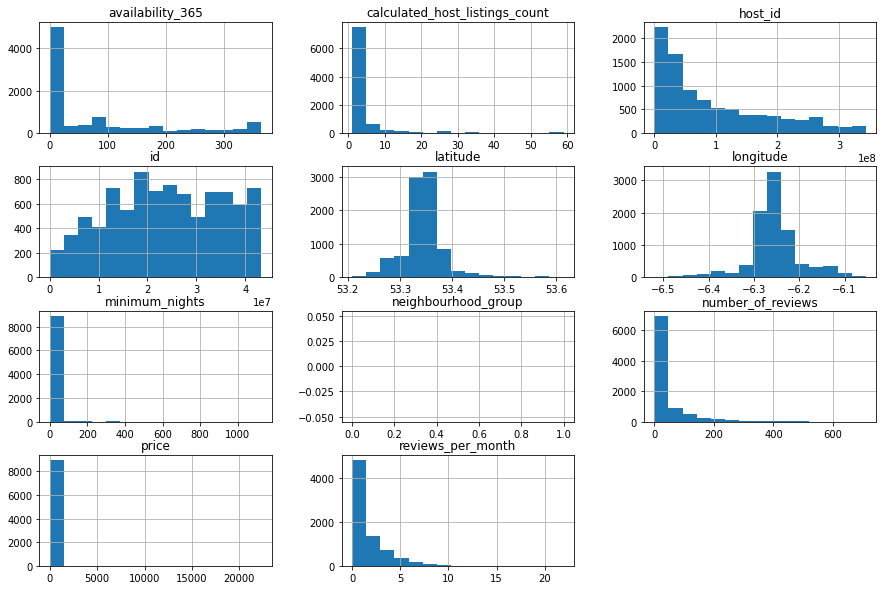

In [0]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

## **Quarto levantamento** - Há outliers presentes?

De acordo com os histogramas percebemos indícios de outliers em 'variáveis price', 'minimum_nights' e 'calculated_host_listings_count'.

Para melhorar a identificação de outliers utilizaremos:

* Resumo estatístico por meio do método describe()
* Plotar boxplots para a variável.

In [0]:
# ver o resumo estatístico das variáveis numéricas
df# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe().describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,4009.874286,1264.919901,1227.843300,937.081779,1129.702256,1204.841974
std,8024.806667,3134.268671,3133.918055,2638.899642,3164.383746,3136.258298
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,80.500000,1.750000,7.000000,0.675000,1.000000,1.500000
50%,143.986274,3.742718,38.270617,1.707115,3.439571,94.867896
75%,2502.016307,297.655328,226.403872,7.152500,20.554178,182.000000
max,22337.000000,8961.000000,8961.000000,7468.000000,8961.000000,8961.000000


Portanto,

A variável 'price' possui 75% do valor abaixo de 2502, porém seu valor máximo é 22337.
A quantidade mínima de noites (minimum_nights) está apenas com 8 dias de 365 dias no ano.
Boxplot para 'minimum_nights'

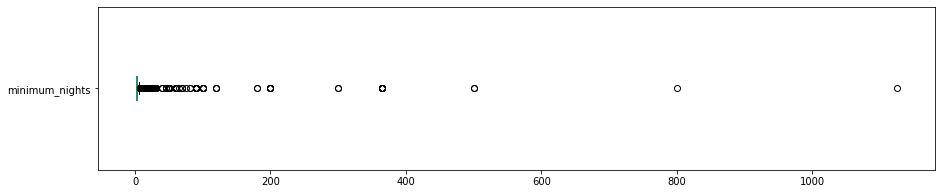

minimum_nights: valores acima de 30:
78 entradas
0.8704%


In [0]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

Boxplot para price

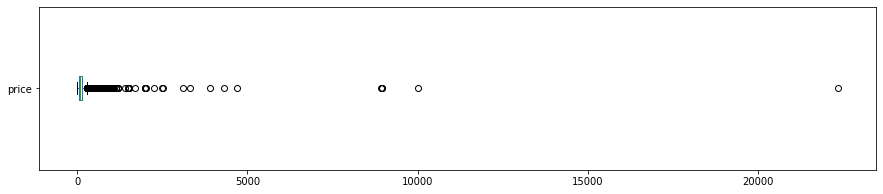


price: valores acima de 8000
5 entradas
0.0558%


In [0]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 8000 para price
print("\nprice: valores acima de 8000")
print("{} entradas".format(len(df[df.price > 8000])))
print("{:.4f}%".format((len(df[df.price > 8000]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

Faremos o Histogramas sem outliers
após identificados nas variáveis 'price' e 'minimum_nights', limparemos o DataFrame em cada variável e obtemos o seguinte histograma.

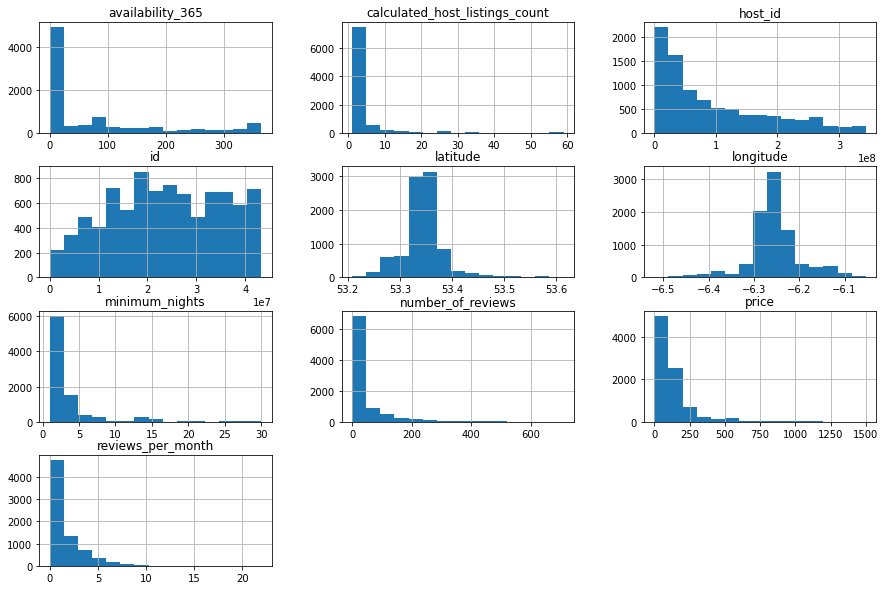

In [0]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

## **Quinto levantamento**: A correlação existente entre as variáveis
A idéia é identificar uma relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. 

Iremos criar a matriz de correlação, gerar heatmap e usar a biblioteca seaborn, assim será possível identificar as correlações existentes entre as variáveis escolhidas.

In [0]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.030050,-0.057641,-0.030385,0.169186,0.118198
minimum_nights,0.030050,1.000000,-0.049939,-0.070268,0.096850,0.063064
number_of_reviews,-0.057641,-0.049939,1.000000,0.779334,0.001034,0.171525
reviews_per_month,-0.030385,-0.070268,0.779334,1.000000,0.063120,0.183873
calculated_host_listings_count,0.169186,0.096850,0.001034,0.063120,1.000000,0.174560
availability_365,0.118198,0.063064,0.171525,0.183873,0.174560,1.000000


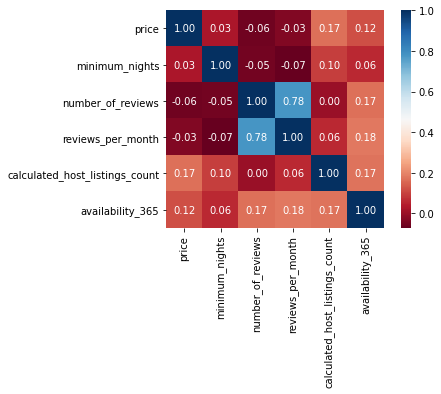

In [0]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

## **Sexto levantamento**: Qual o tipo de imóvel mais alugado no Airbnb?
Olharemos para a variável 'room_type' e contar a quantidade de ocorrências de cada tipo de aluguel, apartamentos ou casas inteiras e compartilhados ou não, usando o método 'value_counts'



In [0]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    4389
Private room       4245
Shared room         145
Hotel room           84
Name: room_type, dtype: int64

In [0]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.495205
Private room       0.478957
Shared room        0.016360
Hotel room         0.009478
Name: room_type, dtype: float64

## **Sétimo levantamento**: Qual a localidade mais cara de Dublin?

A partir do preço de locação podemos comparar os bairros (neighbourhoods), usando groupby() para verificar um avariável em função de outra.

In [0]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Dublin City              134.239965
Dn Laoghaire-Rathdown    117.025210
Fingal                    89.865459
South Dublin              83.397626
Name: price, dtype: float64

Acima, vemos que 'Dublin City' e 'Dn Laoghaire-Rathdown', estão com média de preço superior a de lugares como 'Fingal' e 'South Dublin'.

Uma pessoa que não conhecesse Dublin poderia apresentar esses resultados sem se questionar. Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há para Dn Laoghaire-Rathdown.

In [0]:
# ver quantidade de imóveis no Dn Laoghaire-Rathdown
print(df_clean[df_clean.neighbourhood == "Dn Laoghaire-Rathdown"].shape)

# ver as 3 entradas do xxxx
df_clean[df_clean.neighbourhood == "Dn Laoghaire-Rathdown"]

(952, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,44077,cosy comfortable Irish cottage twin,193005,Teresa,Dn Laoghaire-Rathdown,53.28995,-6.25813,Private room,50,3,227,2020-03-06,2.05,3,314
2,85156,Cosy Comfortable Irish Cottage 1 Double Bed,193005,Teresa,Dn Laoghaire-Rathdown,53.29178,-6.25618,Private room,50,3,182,2020-03-09,1.68,3,308
5,162809,5.5 miles south of Dublin City :^),777681,Robbie,Dn Laoghaire-Rathdown,53.28326,-6.19188,Private room,55,1,289,2020-03-19,4.84,2,250
10,200979,"""The Lodge, Dalkey Avenue .""",982970,Paul,Dn Laoghaire-Rathdown,53.27420,-6.10917,Entire home/apt,220,1,148,2020-03-16,1.53,1,217
14,254941,Cosy Double Room in South Dublin Home from Home,1339322,Rachel,Dn Laoghaire-Rathdown,53.27903,-6.18898,Private room,41,1,160,2020-02-26,1.56,2,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8903,43007174,Beacon South Quarter Serviced Apartment,342367358,Adam,Dn Laoghaire-Rathdown,53.27671,-6.21710,Entire home/apt,149,14,0,NaN,NaN,1,90
8926,43102154,Luxury Home Dublin Mountains with Stunning Views,7540480,Patricia,Dn Laoghaire-Rathdown,53.22414,-6.24239,Entire home/apt,250,3,0,NaN,NaN,1,163
8951,43215208,"Beautiful Castle in Dublin, Ireland",56132073,Terry,Dn Laoghaire-Rathdown,53.27001,-6.11199,Private room,370,1,0,NaN,NaN,1,173
8957,43248096,"South Dublin Home, Dublin on your doorstep",17505509,Aaron,Dn Laoghaire-Rathdown,53.24998,-6.13439,Entire home/apt,100,7,0,NaN,NaN,1,358


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se x=longitude e y=latitude.

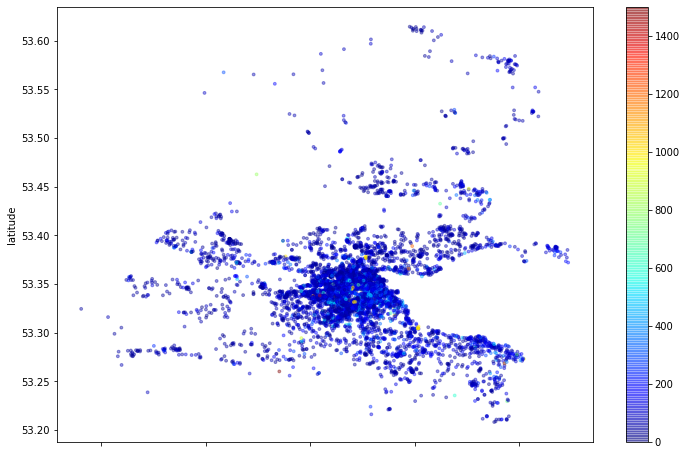

In [0]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## **Conclusões**

Esta análise é superficial e identifica outliers em algumas variáveis.

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.